# Assignment 7

In [2]:
# importing Shakespeare's play Macbeth from Project Gutenberg 

In [3]:
import requests
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from string import punctuation
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
import pandas as pd

In [4]:
response = requests.get('https://www.gutenberg.org/cache/epub/2264/pg2264.html')

In [5]:
response

<Response [200]>

In [6]:
from bs4 import BeautifulSoup

In [7]:
document = BeautifulSoup(response.text, "html.parser")

In [8]:
text = document.text

In [9]:
# tokenizing the words

In [10]:
sent = sent_tokenize(text)
new_sent = sent[140:1603]

In [11]:
words = []
for s in new_sent:
    for w in word_tokenize(s):
        words.append(w)
print(words)

['Scoena', 'Prima', '.', 'Thunder', 'and', 'Lightning', '.', 'Enter', 'three', 'Witches', '.', '1', '.', 'When', 'shall', 'we', 'three', 'meet', 'againe', '?', 'In', 'Thunder', ',', 'Lightning', ',', 'or', 'in', 'Raine', '?', '2', '.', 'When', 'the', 'Hurley-burley', "'s", 'done', ',', 'When', 'the', 'Battaile', "'s", 'lost', ',', 'and', 'wonne', '3', '.', 'That', 'will', 'be', 'ere', 'the', 'set', 'of', 'Sunne', '1', '.', 'Where', 'the', 'place', '?', '2', '.', 'Vpon', 'the', 'Heath', '3', '.', 'There', 'to', 'meet', 'with', 'Macbeth', '1', '.', 'I', 'come', ',', 'Gray-Malkin', 'All', '.', 'Padock', 'calls', 'anon', ':', 'faire', 'is', 'foule', ',', 'and', 'foule', 'is', 'faire', ',', 'Houer', 'through', 'the', 'fogge', 'and', 'filthie', 'ayre', '.', 'Exeunt', '.', 'Scena', 'Secunda', '.', 'Alarum', 'within', '.', 'Enter', 'King', ',', 'Malcome', ',', 'Donalbaine', ',', 'Lenox', ',', 'with', 'attendants', ',', 'meeting', 'a', 'bleeding', 'Captaine', '.', 'King', '.', 'What', 'bloody',

In [13]:
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# removing Stop Words

In [15]:
myStopWords = list(punctuation) + stopwords.words('english')
print(myStopWords)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when'

In [16]:
wordsNoStop = []
for i in words:
    if i not in myStopWords:
        wordsNoStop.append(i)

In [17]:
wordsNoStopComp = [w for w in words if w not in myStopWords]
print(wordsNoStopComp)

['Scoena', 'Prima', 'Thunder', 'Lightning', 'Enter', 'three', 'Witches', '1', 'When', 'shall', 'three', 'meet', 'againe', 'In', 'Thunder', 'Lightning', 'Raine', '2', 'When', 'Hurley-burley', "'s", 'done', 'When', 'Battaile', "'s", 'lost', 'wonne', '3', 'That', 'ere', 'set', 'Sunne', '1', 'Where', 'place', '2', 'Vpon', 'Heath', '3', 'There', 'meet', 'Macbeth', '1', 'I', 'come', 'Gray-Malkin', 'All', 'Padock', 'calls', 'anon', 'faire', 'foule', 'foule', 'faire', 'Houer', 'fogge', 'filthie', 'ayre', 'Exeunt', 'Scena', 'Secunda', 'Alarum', 'within', 'Enter', 'King', 'Malcome', 'Donalbaine', 'Lenox', 'attendants', 'meeting', 'bleeding', 'Captaine', 'King', 'What', 'bloody', 'man', 'report', 'As', 'seemeth', 'plight', 'Reuolt', 'The', 'newest', 'state', 'Mal', 'This', 'Serieant', 'Who', 'like', 'good', 'hardie', 'Souldier', 'fought', "'Gainst", 'Captiuitie', 'Haile', 'braue', 'friend', 'Say', 'King', 'knowledge', 'Broyle', 'As', 'thou', 'didst', 'leaue', 'Cap', 'Doubtfull', 'stood', 'As', 't

In [18]:
# stemming the words

In [19]:
stemmed = [WordNetLemmatizer().lemmatize(w) for w in wordsNoStopComp]

In [20]:
# calculating word frequencies

In [21]:
freq = FreqDist(stemmed)
freq

FreqDist({'I': 330, "'d": 192, 'And': 170, 'Macb': 137, "'s": 128, 'The': 117, 'haue': 117, 'Enter': 80, 'That': 80, 'What': 73, ...})

In [22]:
df = pd.DataFrame(stemmed)
df.value_counts()

I            330
'd           192
And          170
Macb         137
's           128
            ... 
Vertues        1
Very           1
Vessell        1
Vessels        1
brandisht      1
Length: 3884, dtype: int64

In [23]:
freq = df.value_counts()

In [24]:
freq_df = pd.DataFrame(freq)
freq_df.columns=['frequency']
freq_df

,frequency
0,
I,330
'd,192
And,170
Macb,137
's,128
...,...
Vertues,1
Very,1
Vessell,1


In [25]:
freq_df.mean()

frequency    3.145211
dtype: float64

In [26]:
freq_df[freq_df['frequency'] > 1].mean()

frequency    7.099561
dtype: float64

In [27]:
freq_df.median()

frequency    1.0
dtype: float64

In [28]:
freq_df.mode()

,frequency
0,1


In [29]:
# Creating a histogram of the word frequency data

<AxesSubplot:ylabel='Frequency'>

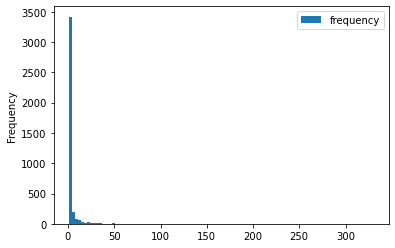

In [30]:
freq_df.plot(kind = 'hist', bins=100)

In [31]:
# This histogram displays that the majority of words in Macbeth occur only a few times, which is consistent with the mean of around 3, the median of 1, and the mode of 1. 

In [32]:
# Calculating the standard deviation and the interquartile range

In [33]:
freq_df.std()

frequency    9.636827
dtype: float64

In [34]:
q1= freq_df.quantile(0.25)
q1

frequency    1.0
Name: 0.25, dtype: float64

In [35]:
q3= freq_df.quantile(0.75)
q3

frequency    2.0
Name: 0.75, dtype: float64

In [36]:
iqr = q3-q1
iqr

frequency    1.0
dtype: float64

In [37]:
# the standard deviation is 9.636827 and the interquartile range is 1.0

## Foray into machine learning

In [38]:
from sklearn import datasets
df = datasets.load_diabetes(as_frame=True) 
features_df = df.data
target_df = df.target

In [39]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [47]:
df

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

In [41]:
features_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [43]:
features_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [44]:
target_df.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [ ]:
# Finding the column in features_df that has the highest correlation coefficient with the target values in target_df

In [51]:
features_df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [57]:
df[['age','sex']].corr()

TypeError: unhashable type: 'list'

In [60]:
print(features_df['age'].corr(target_df))

0.18788875071891983


In [61]:
print(features_df['sex'].corr(target_df))

0.0430619984516054


In [62]:
print(features_df['bmi'].corr(target_df))

0.5864501344746891


In [63]:
print(features_df['bp'].corr(target_df))

0.4414838489308862


In [64]:
print(features_df['s1'].corr(target_df))

0.2120224810145508


In [65]:
print(features_df['s2'].corr(target_df))

0.17405358696874249


In [67]:
print(features_df['s3'].corr(target_df))

-0.39478925067091847


In [68]:
print(features_df['s4'].corr(target_df))

0.4304528847447734


In [69]:
print(features_df['s5'].corr(target_df))

0.5658834252428094


In [70]:
print(features_df['s6'].corr(target_df))

0.3824834842485812


In [71]:
# the column with the highest correlation is with features_df column BMI

In [72]:
# creating a scatter plot of the target values vs the BMI column 

In [74]:
import matplotlib.pyplot as plt

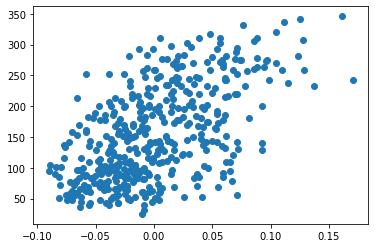

In [78]:
plt.scatter(features_df['bmi'], target_df)

In [79]:
# the plotted points show some correlation which makes sense given that the correlation coefficient is roughly 0.58

In [ ]:
# performing linear regression with sklearn's LinearRegression

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [116]:
X = features_df[['bmi']]
y = target_df

In [117]:
reg = LinearRegression().fit(X, y)

In [118]:
reg.coef_

array([949.43526038])

In [119]:
reg.intercept_

152.1334841628967

In [120]:
ytrain = reg.intercept_ + reg.coef_ * X

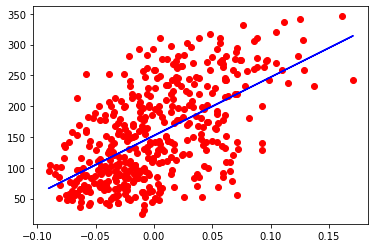

In [121]:
plt.plot(X,y,'ro',X,ytrain,'b-');

In [122]:
mean_squared_error(y, ytrain)

3890.4565854612724

In [123]:
r2_score(y, ytrain)

0.3439237602253803

In [93]:
# Trying linear regression with another variable

In [108]:
A = features_df[['age']]
B = target_df

In [109]:
newreg = LinearRegression().fit(A, B)

In [110]:
newreg.coef_

array([304.18307453])

In [111]:
newreg.intercept_

152.13348416289605

In [112]:
btrain = newreg.intercept_ + newreg.coef_ * A

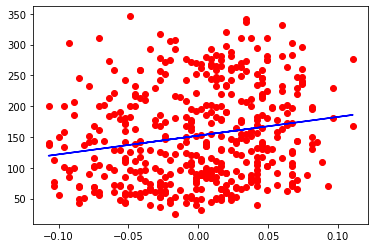

In [114]:
plt.plot(A,B,'ro',A,btrain,'b-');

In [115]:
mean_squared_error(B, btrain)

5720.5470172056475

In [124]:
r2_score(B, btrain)

0.03530218264671636

In [125]:
# this mean squared is much higher than the previous mean squared which makes sense as the line isn't as well fitted to these data points 

In [126]:
# the R-squared score is much lower which makes sense since the correlation between age and the target values is lower than the correlation between bmi and the target values